In [1]:
import numpy as np
import requests
import pandas as pd
import csv
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import folium
import json
import matplotlib as mp
from sklearn.cluster import KMeans

print('Installed correctly')


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    scipy-1.4.1                |   py36h921218d_0        18.9 MB  conda-forge
    libcblas-3.8.0             |      11_openblas          10 KB  conda-forge


In [2]:
pip install BeautifulSoup4

     |████████████████████████████████| 112kB 29.6MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
from bs4 import BeautifulSoup
import xml

In [ ]:
#define url to webscrape
source = requests.get('https://en.wikipedia.org/wiki/List_of_Houston_neighborhoods').text
soup = BeautifulSoup(source,'html')

#makes it easy to read
print(soup.prettify())

# Scrape following page

In [ ]:
#table generation
table = soup.find('table',{'class':'wikitable'})
table

In [ ]:
#find the table we need
links = table.find_all('td')
links

In [7]:
#create list of what we want from table
Number = []
Name = [] 
Relative = []

In [8]:
#scrapes values of td for only text and assigns them to respective areas
for i in range(0, len(links), 4):
    Number.append(links[i])
    Name.append(links[i+1].find(text=True).rstrip())
    Relative.append(links[i+2].find(text=True).rstrip())

In [9]:
#puts into a data frame
df_Houstonsuper = pd.DataFrame(data=[Number,Name,Relative]).transpose()
df_Houstonsuper.columns =['Number', 'Name','Location Relative to Downtown Houston']

In [10]:
#let see how it looks
df_Houstonsuper.head(60)

,Number,Name,Location Relative to Downtown Houston
0,[1\n],Willowbrook,Northwest
1,[2\n],Greater Greenspoint,North
2,[3\n],Carverdale,Northwest
3,[4\n],Fairbanks,Northwest
4,[5\n],Greater Inwood,Northwest
5,[6\n],Acres Home,Northwest
6,[7\n],Hidden Valley,North
7,[8\n],Westbranch,West
8,[9\n],Addicks / Park Ten,West
9,[10\n],Spring Branch,West


In [11]:
df_Houstonsuper.shape

(88, 3)

In [12]:
pip install geocoder

     |████████████████████████████████| 102kB 19.6MB/s ta 0:00:01
     |████████████████████████████████| 829kB 34.2MB/s eta 0:00:01
     |████████████████████████████████| 81kB 18.8MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [13]:
import geocoder

In [14]:
def get_latlng(name):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Houston, Texas'.format(name))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [15]:
coords = [ get_latlng(name) for name in df_Houstonsuper['Name'].tolist()]

In [16]:
coords

[[29.95240000000007, -95.54463999999996],
 [29.93903000000006, -95.40746999999999],
 [29.849590000000035, -95.54244999999997],
 [29.852760000000046, -95.52417999999994],
 [29.86931000000004, -95.48042999999996],
 [29.870160000000055, -95.43535999999995],
 [29.88847000000004, -95.41459999999995],
 [29.83937000000003, -95.55360999999999],
 [29.814020000000028, -95.61618999999996],
 [29.8035174965043, -95.51589580701445],
 [29.826440000000048, -95.48876999999999],
 [33.217340000000036, -96.62706999999995],
 [29.82797000000005, -95.39369999999997],
 [29.79684000000003, -95.43403999999998],
 [29.796250000000043, -95.39486999999997],
 [29.77263000000005, -95.57128999999998],
 [29.75795000000005, -95.63094999999998],
 [29.74768000000006, -95.57423999999997],
 [29.725482868546916, -95.55103437265262],
 [29.732170000000053, -95.52336999999994],
 [29.760150000000067, -95.47670999999997],
 [29.88855838993748, -95.324499],
 [29.803790799167864, -95.47214335271619],
 [29.76058000000006, -95.3696799

In [17]:
#create temporty data frome
df_coords =pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [18]:
#Merge to old dataframe
df_Houstonsuper['Latitude']=df_coords['Latitude']
df_Houstonsuper['Longitude']=df_coords['Longitude']

In [19]:
#check combined data frame for lat and lng data
df_Houstonsuper

,Number,Name,Location Relative to Downtown Houston,Latitude,Longitude
0,[1\n],Willowbrook,Northwest,29.952400,-95.544640
1,[2\n],Greater Greenspoint,North,29.939030,-95.407470
2,[3\n],Carverdale,Northwest,29.849590,-95.542450
3,[4\n],Fairbanks,Northwest,29.852760,-95.524180
4,[5\n],Greater Inwood,Northwest,29.869310,-95.480430
...,...,...,...,...,...
83,[84\n],Spring Branch,Northwest,29.803517,-95.515896
84,[85\n],Spring Branch Central,Northwest,29.815870,-95.517730
85,[86\n],Spring Branch East,Northwest,29.807620,-95.480110
86,[87\n],Greenway,Southwest,29.732219,-95.428809


In [20]:
#check shape
print(df_Houstonsuper.shape)

(88, 5)


In [21]:
#save as csv file
df_Houstonsuper.to_csv("df_Houstonsuper.csv", index=False)

# Make map with super neighborhoods

In [22]:
#get location of Houston Texas

address ='Houston, Texas'
geolocator = Nominatim(user_agent='my-application')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('Geographical location of Houston Texas is {},{}.'.format(latitude, longitude))

Geographical location of Houston Texas is 29.7589382,-95.3676974.


In [23]:
#Houston Map
Houston_map = folium.Map(location=[latitude, longitude], zoom_start = 11)

for lat, lng, name in zip(df_Houstonsuper['Latitude'], df_Houstonsuper['Longitude'], df_Houstonsuper['Name']):
    label = '{}'.format(name)
    popup = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius = 5,
    popup = popup,
    color = 'blue',
    fill = True,
    fill_color = '#3186cc',
    fill_opacity = 0.7,
    parse_html=False).add_to(Houston_map)
    
Houston_map

In [24]:
#save as HTML
Houston_map.save ('Housto_map.html')

# Define Foursquare Credentials and Version

In [25]:
#removed for sharing
CLIENT_ID = '1YYOWV1IOQDCLE4GDZKQLOJPRKDQRJ3W45BLB4SXDKNUSNJ2' # your Foursquare ID
CLIENT_SECRET = 'TT2LTZDS4FTSGT2IB2E0FLSVY1EAMHNHWLPT5S1KACWDI5OF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1YYOWV1IOQDCLE4GDZKQLOJPRKDQRJ3W45BLB4SXDKNUSNJ2
CLIENT_SECRET:TT2LTZDS4FTSGT2IB2E0FLSVY1EAMHNHWLPT5S1KACWDI5OF


In [ ]:
#Category ID corresponding to food and drink shop taken from Foursquare website (https://developer.foursquare.com/docs/resources/categories)

radius = 2000
LIMIT = 100

venues_list = []

for lat,lng, name in zip(df_Houstonsuper['Latitude'],df_Houstonsuper['Longitude'],df_Houstonsuper['Name']):
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for v in results:
        venues_list.append((
                name,
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']))

In [50]:
#venue_list to new data frame
df_venues = pd.DataFrame(venues_list)

#column names
df_venues.columns = ['Name', 
                     'Name Latitude', 
                     'Name Longitude', 
                     'Venue Name',
                     'Venue Latitude',
                     'Venue Logitude',
                     'Venue Category']

df_venues.head()

,Name,Name Latitude,Name Longitude,Venue Name,Venue Latitude,Venue Logitude,Venue Category
0,Willowbrook,29.9524,-95.54464,Babin's Seafood House,29.955088,-95.544452,Seafood Restaurant
1,Willowbrook,29.9524,-95.54464,bed bath & beyond #45,29.953243,-95.543904,Furniture / Home Store
2,Willowbrook,29.9524,-95.54464,buybuy BABY,29.953127,-95.543557,Kids Store
3,Willowbrook,29.9524,-95.54464,Costco,29.954658,-95.547697,Warehouse Store
4,Willowbrook,29.9524,-95.54464,Saltgrass Steak House,29.955011,-95.542082,Steakhouse


In [51]:
print(df_venues.shape)

(5051, 7)


# How many venues were returned for each Neighborhood

In [52]:
df_venues.groupby(['Name']).count()

,Name Latitude,Name Longitude,Venue Name,Venue Latitude,Venue Logitude,Venue Category
Name,,,,,,
Acres Home,6,6,6,6,6,6
Addicks / Park Ten,6,6,6,6,6,6
Afton Oaks,100,100,100,100,100,100
Alief,55,55,55,55,55,55
Astrodome Area,49,49,49,49,49,49
...,...,...,...,...,...,...
Westbury,34,34,34,34,34,34
Westchase,100,100,100,100,100,100
Westwood,82,82,82,82,82,82


In [169]:
#Average number of venues gathered
df_venues.groupby(['Name']).count().mean()

Name Latitude     58.057471
Name Longitude    58.057471
Venue Name        58.057471
Venue Latitude    58.057471
Venue Logitude    58.057471
Venue Category    58.057471
dtype: float64

# How many unique categories are curated from all retured venues

In [53]:
print('There are {} unique categories'.format(len(df_venues['Venue Category'].unique())))

There are 319 unique categories


In [170]:
#print out list of venue categories
df_venues['Venue Category'].unique()[:50]

array(['Seafood Restaurant', 'Furniture / Home Store', 'Kids Store',
       'Warehouse Store', 'Steakhouse', 'Wings Joint', 'Thai Restaurant',
       'Vietnamese Restaurant', 'Sporting Goods Shop',
       'Health & Beauty Service', 'Movie Theater', 'Buffet',
       'Toy / Game Store', 'Latin American Restaurant', 'Coffee Shop',
       'Department Store', 'Mediterranean Restaurant', 'BBQ Joint',
       'American Restaurant', 'Fried Chicken Joint', 'Chinese Restaurant',
       'Electronics Store', 'Bar', 'Fast Food Restaurant',
       'Lingerie Store', 'Wine Shop', 'Mexican Restaurant', 'Gym',
       'Cajun / Creole Restaurant', 'Clothing Store', 'Bakery',
       'Grocery Store', 'Gym / Fitness Center', 'Hotel',
       'Japanese Restaurant', 'Deli / Bodega', 'Sports Bar',
       'Italian Restaurant', 'Cosmetics Shop', 'Burger Joint',
       'Mobile Phone Shop', 'Arts & Crafts Store', 'Shoe Store',
       'Chocolate Shop', 'Video Game Store', 'Supplement Shop',
       'Juice Bar', 'Access

# Analyze Each Neighborhood

In [55]:
Houston_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix = "", prefix_sep = "")

#add Name column back to dataframe
Houston_onehot['Name'] = df_venues['Name']

#move Name to first column
fixed_columns = [Houston_onehot.columns[-1]] + list(Houston_onehot.columns[:-1])
Houston_onehot = Houston_onehot[fixed_columns]

Houston_onehot.head()

,Name,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,...,Warehouse,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Group rows by Name and take mean of frequency of occurence in each category

In [56]:
Houston_grouped = Houston_onehot.groupby('Name').mean().reset_index()
Houston_grouped

,Name,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,...,Warehouse,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Acres Home,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
1,Addicks / Park Ten,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
2,Afton Oaks,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.030000,0.00,0.0,0.0,0.0
3,Alief,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
4,Astrodome Area,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Westbury,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
83,Westchase,0.0,0.010000,0.0,0.0,0.010000,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.010000,0.00,0.0,0.0,0.0
84,Westwood,0.0,0.000000,0.0,0.0,0.012195,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.012195,0.00,0.0,0.0,0.0
85,Willow Meadows / Willowbend,0.0,0.014925,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.014925,0.00,0.0,0.0,0.0


In [57]:
print(Houston_grouped.shape)

(87, 320)


In [158]:
#number of grocery stores
len(Houston_grouped[Houston_grouped["Grocery Store"] > 0])

51

# Data with only Grocery Store as df

In [110]:
Houston_grocery = Houston_grouped[['Name','Grocery Store']]

In [111]:
Houston_grocery.head(60)

,Name,Grocery Store
0,Acres Home,0.000000
1,Addicks / Park Ten,0.000000
2,Afton Oaks,0.000000
3,Alief,0.018182
4,Astrodome Area,0.020408
5,Braeburn,0.053571
6,Braeswood,0.000000
7,Brays Oaks (formerly Greater Fondren S.W.),0.096154
8,Briar Forest,0.050000
9,Carverdale,0.000000


# Cluster Houston Neigborhood Names 

In [112]:
from sklearn.cluster import KMeans

In [138]:
#set number of clusters
kclusters = 4

Houston_grocery_clustering = Houston_grocery.drop(['Name'],1)

#run k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Houston_grocery_clustering)

#check cluster labels
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 0, 2, 1, 0, 2], dtype=int32)

In [139]:
#create new data frame that includes cluster
Houston_merged = Houston_grocery.copy()

#add clustering label
Houston_merged['Cluster Labels'] = kmeans.labels_

In [140]:
Houston_merged.head()

,Name,Grocery Store,Cluster Labels
0,Acres Home,0.000000,2
1,Addicks / Park Ten,0.000000,2
2,Afton Oaks,0.000000,2
3,Alief,0.018182,2
4,Astrodome Area,0.020408,2
5,Braeburn,0.053571,0
6,Braeswood,0.000000,2
7,Brays Oaks (formerly Greater Fondren S.W.),0.096154,1
8,Briar Forest,0.050000,0
9,Carverdale,0.000000,2


# Merge data sets together into single data frame 

In [141]:
Houston_merged = Houston_merged.join(df_Houstonsuper.set_index('Name'), on='Name')

Houston_merged.head()

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
0,Acres Home,0.000000,2,[6\n],Northwest,29.870160,-95.435360
1,Addicks / Park Ten,0.000000,2,[9\n],West,29.814020,-95.616190
2,Afton Oaks,0.000000,2,[23\n],West,29.803791,-95.472143
3,Alief,0.018182,2,[25\n],Southwest,29.710880,-95.595690
4,Astrodome Area,0.020408,2,[34\n],South,29.691500,-95.388690


In [142]:
print(Houston_merged.shape)

(88, 7)


In [143]:
#sort by cluster label
Houston_merged.sort_values(['Cluster Labels'], inplace = True)
Houston_merged

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
33,Greater OST / South Union,0.023810,0,[68\n],Southeast,29.69388,-95.35301
61,Northshore,0.030769,0,[58\n],East,29.78181,-95.22624
23,Fondren Gardens,0.028571,0,[39\n],Southwest,29.62538,-95.50071
32,Greater Inwood,0.055556,0,[5\n],Northwest,29.86931,-95.48043
75,Spring Branch Central,0.027778,0,[85\n],Northwest,29.81587,-95.51773
...,...,...,...,...,...,...,...
30,Greater Heights,0.010000,2,[15\n],Northwest,29.79625,-95.39487
29,Greater Greenspoint,0.011364,2,[2\n],North,29.93903,-95.40747
28,Greater Fifth Ward,0.000000,2,[55\n],Northeast,29.78000,-95.32484
41,Hunterwood,0.000000,2,[54\n],Northeast,29.81961,-95.21038


# Visualize Clusters

In [144]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = mp.cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [mp.colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name, cluster in zip(Houston_merged['Latitude'], Houston_merged['Longitude'], Houston_merged['Name'], Houston_merged['Cluster Labels']):
    label = folium.Popup(str(name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [145]:
#save map as HTML
map_clusters.save('map_cluster.html')

# Examine clusters

In [146]:
#cluster 0
Houston_merged.loc[Houston_merged['Cluster Labels'] == 0]

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
33,Greater OST / South Union,0.023810,0,[68\n],Southeast,29.693880,-95.353010
61,Northshore,0.030769,0,[58\n],East,29.781810,-95.226240
23,Fondren Gardens,0.028571,0,[39\n],Southwest,29.625380,-95.500710
32,Greater Inwood,0.055556,0,[5\n],Northwest,29.869310,-95.480430
75,Spring Branch Central,0.027778,0,[85\n],Northwest,29.815870,-95.517730
39,Harrisburg,0.027778,0,[65\n],Southeast,29.718150,-95.279060
11,Central Southwest,0.050000,0,[40\n],South,29.628550,-95.439890
44,Kashmere Gardens,0.058824,0,[52\n],Northeast,29.803110,-95.312980
38,Gulfton,0.030000,0,[27\n],Southwest,29.711850,-95.482610
78,Trinity / Houston Gardens,0.058824,0,[48\n],Northeast,29.825940,-95.308360


In [147]:
#cluster 1
Houston_merged.loc[Houston_merged['Cluster Labels']==1]

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
40,Hidden Valley,0.103448,1,[7\n],North,29.88847,-95.41460
24,Fort Bend / Houston,0.111111,1,[41\n],Southwest,29.59470,-95.48603
31,Greater Hobby Area,0.071429,1,[78\n],Southeast,29.62949,-95.27848
52,Meadowbrook / Allendale,0.090909,1,[75\n],Southeast,29.69446,-95.24660
18,Eastex - Jensen,0.080000,1,[46\n],Northeast,29.84398,-95.34288
17,East Little York / Homestead,0.090909,1,[47\n],Northeast,29.86697,-95.29728
13,Clinton Park,0.100000,1,[59\n],East,29.74026,-95.25639
7,Brays Oaks (formerly Greater Fondren S.W.),0.096154,1,[36\n],Southwest,29.65732,-95.51693
16,East Houston,0.090909,1,[49\n],Northeast,29.84477,-95.25583


In [148]:
#cluster 2
Houston_merged.loc[Houston_merged['Cluster Labels']==2]

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
58,Minnetex,0.000000,2,[77\n],South,29.620920,-95.323000
57,Midtown,0.010000,2,[62\n],South,29.741460,-95.376710
56,Mid-West (formerly Woodlake/Briarmeadow),0.000000,2,[20\n],West,29.732170,-95.523370
63,Northside Village,0.015152,2,[51\n],North,29.783340,-95.354960
55,Meyerland,0.020000,2,[31\n],Southwest,29.684400,-95.467480
54,Memorial,0.000000,2,[16\n],West,29.772630,-95.571290
60,Neartown,0.000000,2,[24\n],Southwest,29.760580,-95.369680
0,Acres Home,0.000000,2,[6\n],Northwest,29.870160,-95.435360
65,Pecan Park,0.011628,2,[70\n],Southeast,29.707890,-95.289190
83,Westchase,0.000000,2,[19\n],West,29.725483,-95.551034


In [149]:
#cluster 3
Houston_merged.loc[Houston_merged['Cluster Labels']==3]

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
70,South Acres / Crestmont Park,0.230769,3,[76\n],South,29.6311,-95.35415


# Box plot of Cluster labels and Grocery Stores

In [150]:
import seaborn as sns

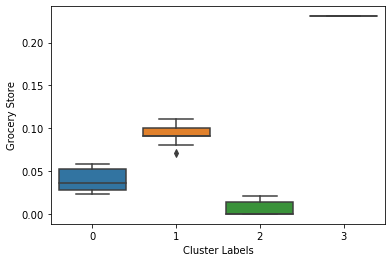

In [151]:
sns.boxplot(Houston_merged['Cluster Labels'], Houston_merged['Grocery Store'])

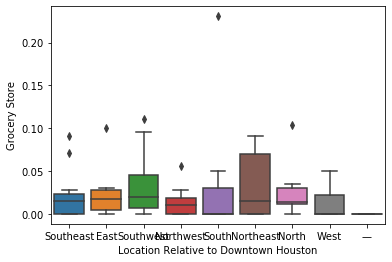

In [175]:
sns.boxplot(Houston_merged['Location Relative to Downtown Houston'], Houston_merged['Grocery Store'])

In [176]:
Houston_merged.describe() 

,Grocery Store,Cluster Labels,Latitude,Longitude
count,88.000000,88.000000,88.000000,88.000000
mean,0.024497,1.500000,29.797238,-95.407567
std,0.036631,0.830455,0.380193,0.176101
min,0.000000,0.000000,29.579670,-96.627070
25%,0.000000,1.000000,29.694985,-95.486715
50%,0.013393,2.000000,29.744570,-95.386625
75%,0.028929,2.000000,29.816565,-95.307747
max,0.230769,3.000000,33.217340,-95.110510
